<a href="https://colab.research.google.com/github/GreeshmaHarids/Code-replication-FeynnLabs/blob/main/Code_replication_md.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 4: Exploring Data**

Let's begin by loading the dataset and examining its key characteristics, including the variable names, the total number of samples, and the first three rows of data to get an initial overview.

In [89]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv("/content/mcdonalds.csv")
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [90]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [91]:
data.shape

(1453, 15)

In [92]:
#Extracting the first eleven columns from data(columns containg segmentation variables)
x_data=data.iloc[:,:11]
# print(x.shape)

#converting the data to a matrix
x=x_data.values

#converting TRUE to 1, and FALSE to 0
x=(x=='Yes').astype(int)

# inspecting the average value of each transformed segementation variable
col_means=np.round(x.mean(axis=0),2)
print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [93]:
#Performing PCA
from sklearn.decomposition import PCA
pca=PCA()
x=pca.fit_transform(x)
print(x.shape)

#finding standard deviation, proprtion of variance, cumulative proportion
std = np.round(np.sqrt(pca.explained_variance_), 3)
prop_var = np.round(pca.explained_variance_ratio_, 3)
cum_prop = np.round(np.cumsum(prop_var), 3)

print("Standard Deviation:", np.round(std, 3))
print("Proportion of Variance:", np.round(prop_var, 3))
print("Cumulative Proportion:", np.round(cum_prop, 3))

(1453, 11)
Standard Deviation: [0.757 0.607 0.505 0.399 0.337 0.31  0.29  0.275 0.265 0.249 0.237]
Proportion of Variance: [0.299 0.193 0.133 0.083 0.059 0.05  0.044 0.04  0.037 0.032 0.029]
Cumulative Proportion: [0.299 0.492 0.625 0.708 0.767 0.817 0.861 0.901 0.938 0.97  0.999]


In [94]:
pca_df = pd.DataFrame(x, columns=[f'PC{i+1}' for i in range(x.shape[1])])


In [95]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


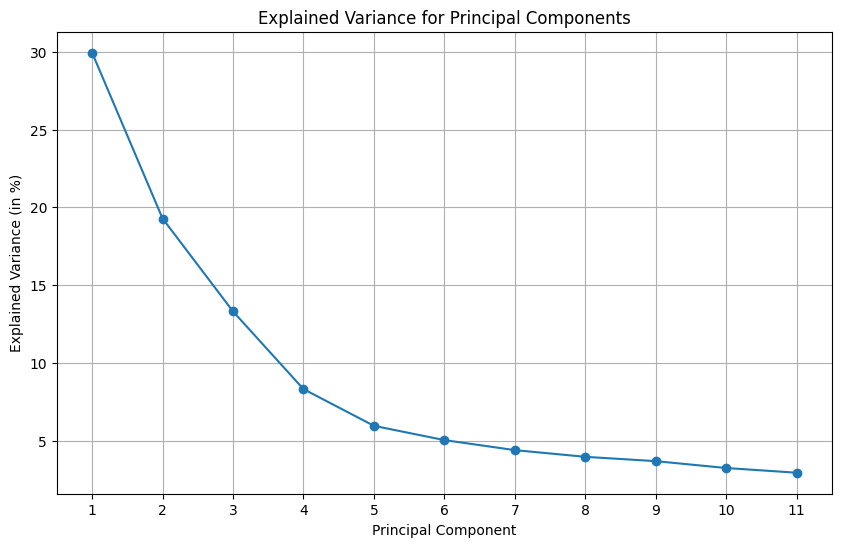

In [96]:
import matplotlib.pyplot as plt

explained_variance=pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1),
         explained_variance*100,
         marker='o'
)
plt.title("Explained Variance for Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (in %)")
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

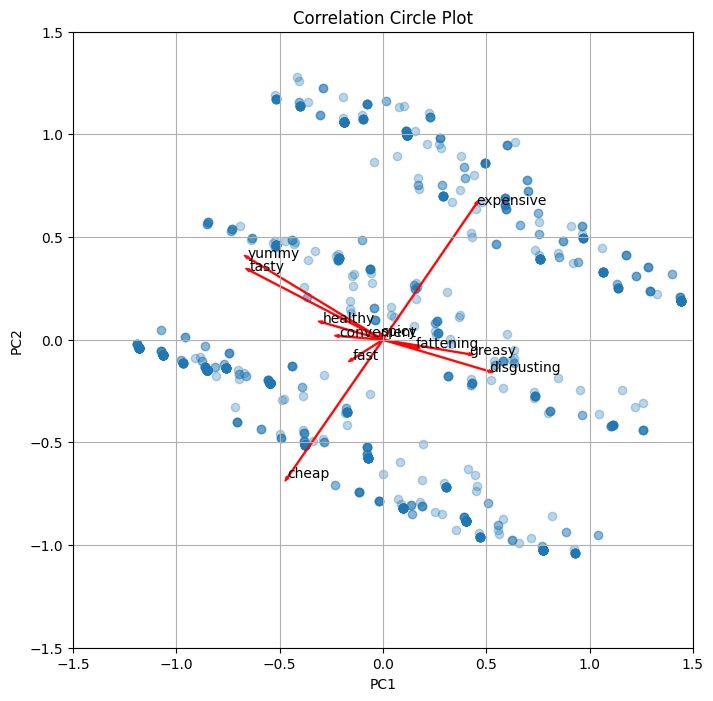

In [97]:
#Get the explained variance ratios for the selected components
explained_variance_ratio = pca.explained_variance_ratio_

#principal component vectors
loadings=pca.components_.T*np.sqrt(explained_variance_ratio)

#set figsize and other layout parameters

plt.figure(figsize=(8,8))


plt.title('Correlation Circle Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

#scatter plot
plt.scatter(x[:,0],x[:,1],alpha=0.3)

mul=2.5

#adding vairiable labels to the plot
for i, feature in enumerate(data.columns[:11]):

    plt.annotate(feature,(mul*loadings[i,0],mul*loadings[i,1]),color='k')

    plt.arrow(0,0,mul*loadings[i,0],mul*loadings[i,1],color='r',alpha=0.9,width=0.005)



plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

plt.grid(True)
plt.show()

# **Step 5: Extracting Segments**

### Using K-Means

In [98]:
x.dtype

dtype('float64')

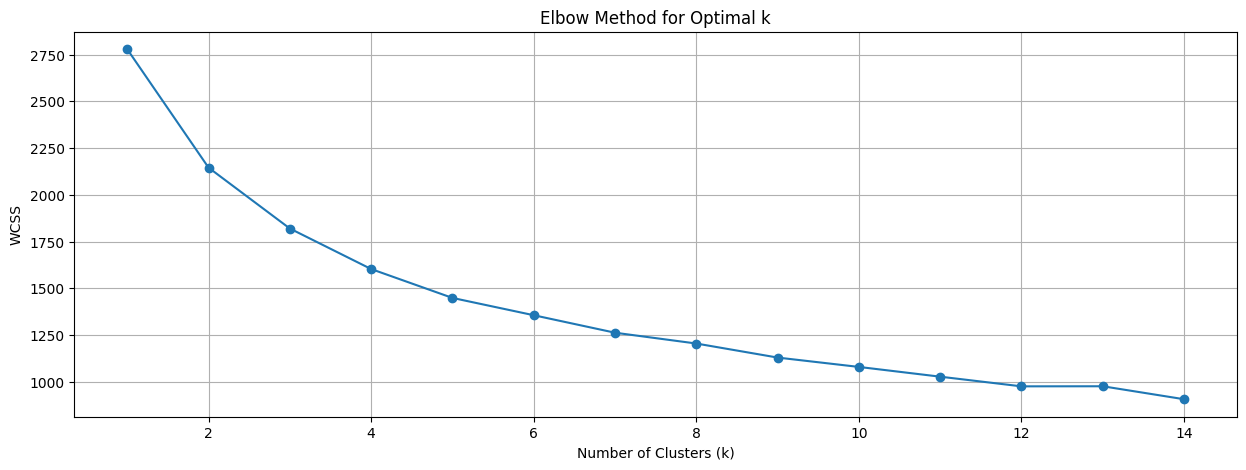

In [99]:
from sklearn.cluster import KMeans


# Preprocess your data if needed (e.g., remove non-numeric columns)
data_model = x

# Initialize a list to store WCSS values
wcss = []

# Compute WCSS for different numbers of clusters
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)  # Use a fixed random_state for reproducibility
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

In [100]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


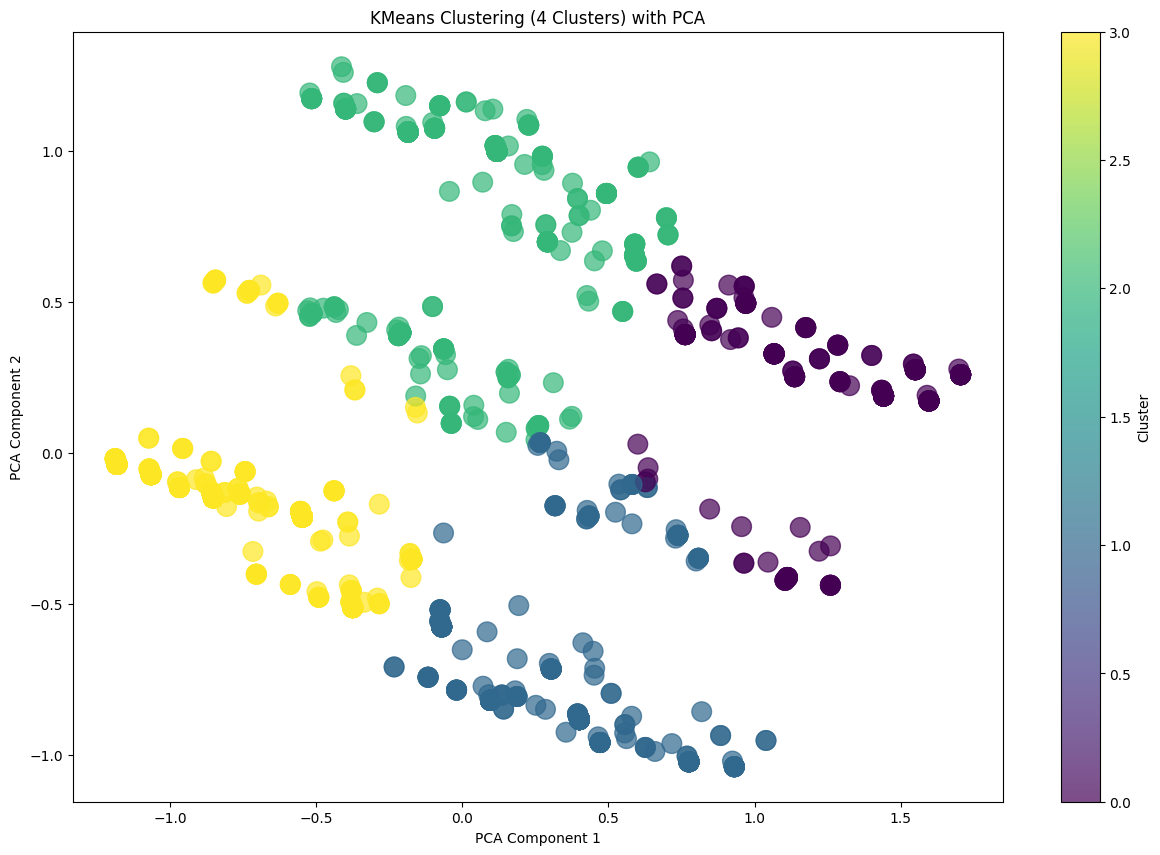

In [101]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_model)

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)  # Specify number of clusters
data_predict = kmeans.fit_predict(data_pca)

# Add cluster labels to the PCA-reduced data for plotting
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data_predict

# Plotting the clusters
plt.figure(figsize=(15, 10))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], s=200, cmap='viridis', alpha=0.7)  # Use cmap for color map
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clustering (4 Clusters) with PCA")
plt.colorbar(label='Cluster')
plt.show()


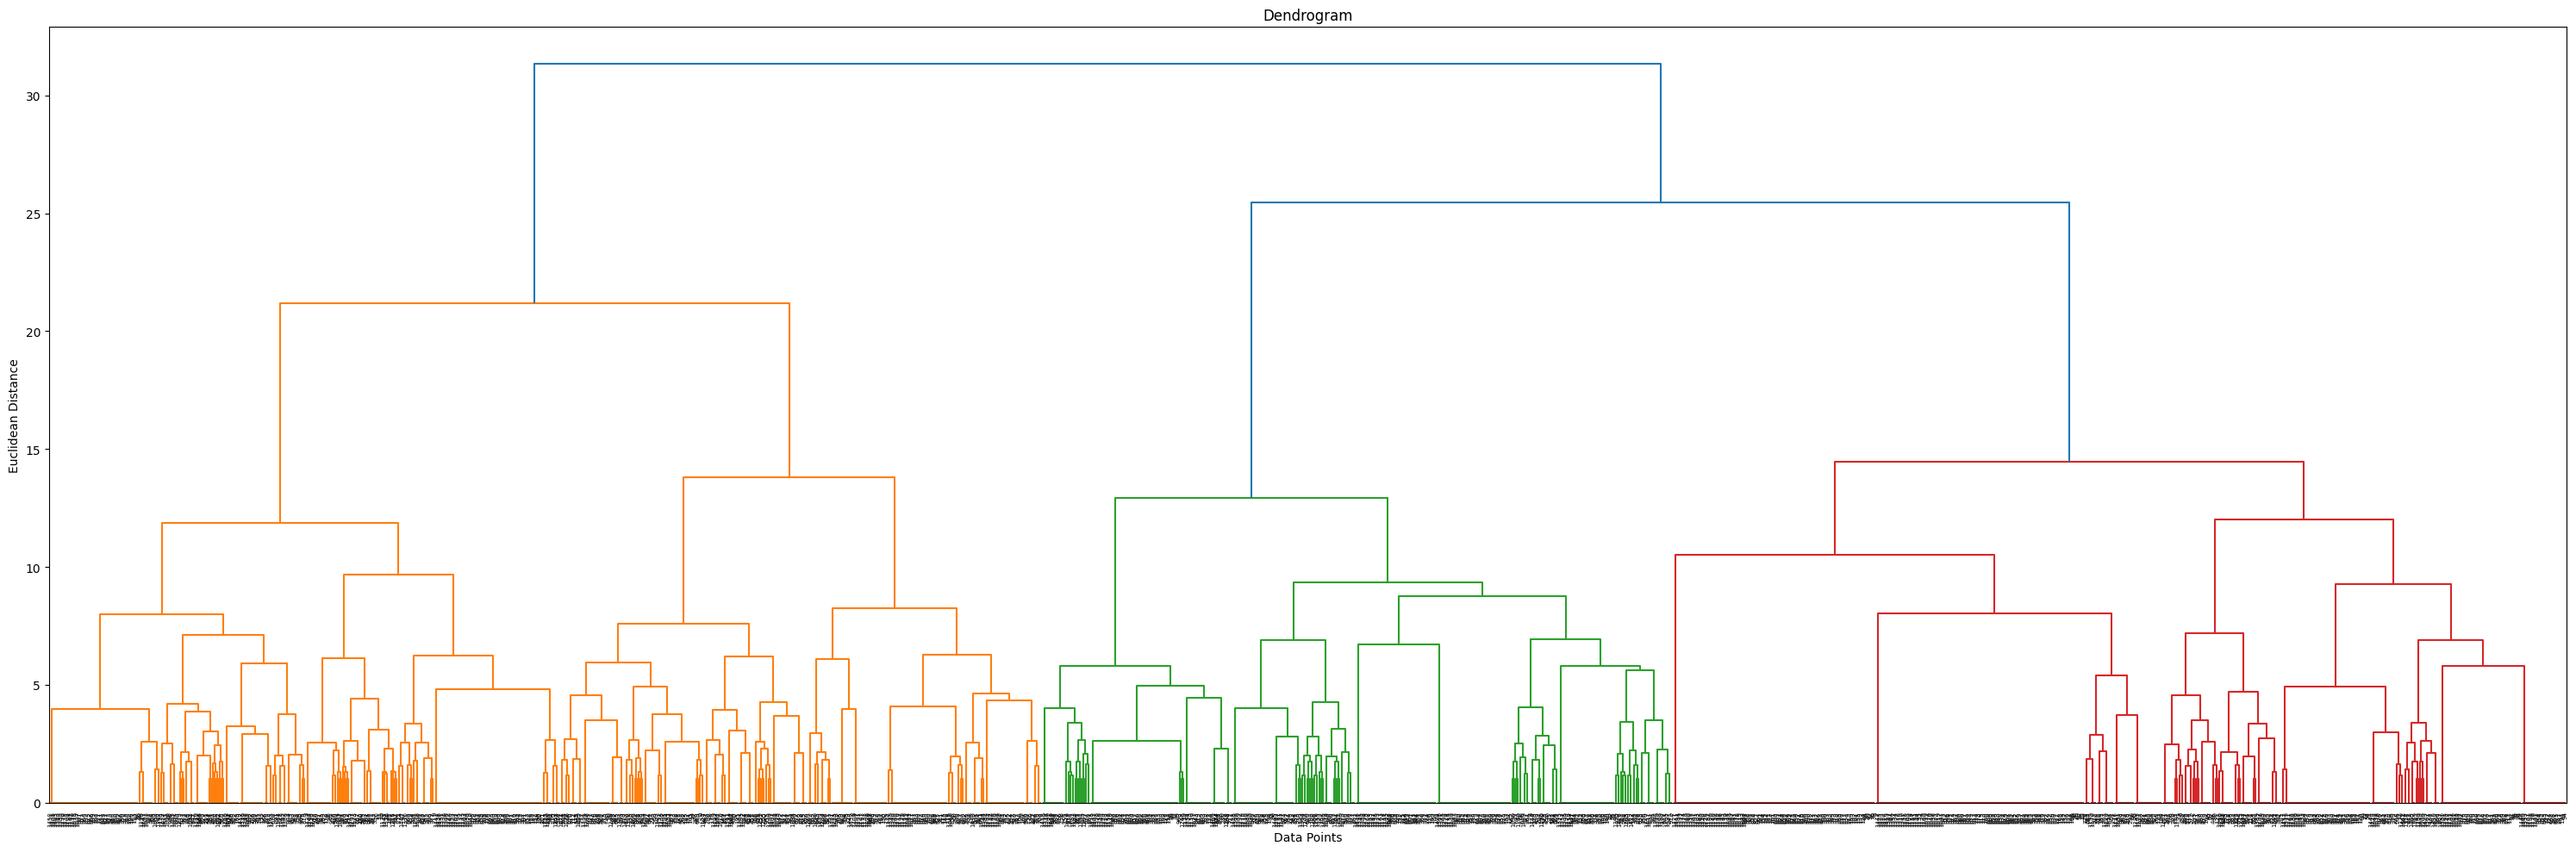

In [102]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt



# Perform hierarchical clustering
merg = linkage(data_model, method='ward')

# Plot the dendrogram
plt.figure(figsize=(30,10))
dendrogram(merg, leaf_rotation=90)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.xticks(rotation=90)
plt.title("Dendrogram")
plt.tight_layout()
plt.show()


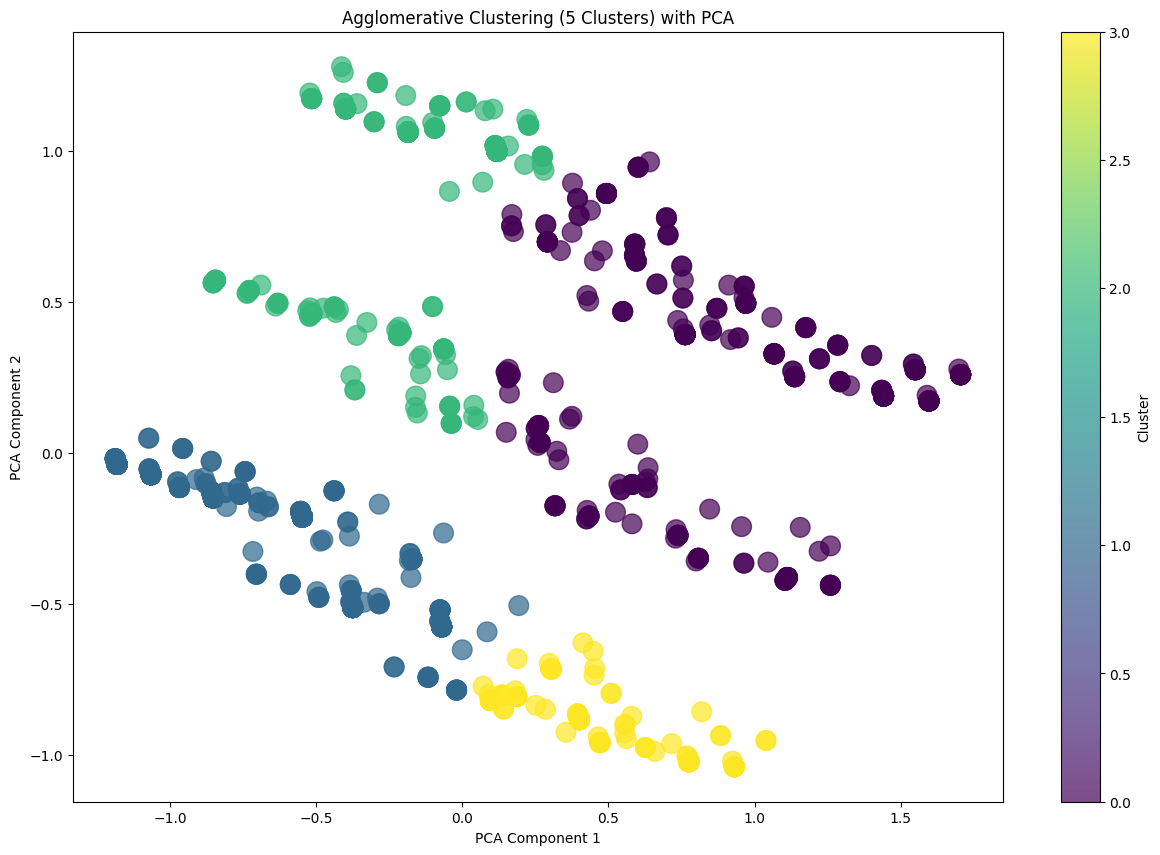

In [103]:

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_model)

# Create and fit the Agglomerative Clustering model
hiyerartical_cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
data_predict = hiyerartical_cluster.fit_predict(data_pca)

# Add cluster labels to the PCA-reduced data for plotting
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data_predict

# Plotting the clusters
plt.figure(figsize=(15, 10))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], s=200, cmap='viridis', alpha=0.7)  # Use cmap for color map
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Agglomerative Clustering (5 Clusters) with PCA")
plt.colorbar(label='Cluster')
plt.show()


### Using Mixtures of Distributions

Components: 2
BIC: -14016.033346145448
AIC: -14834.648123998842
ICL: -14018.033346145448
Components: 3
BIC: -22234.173543054112
AIC: -23464.73640266599
ICL: -22238.173543054112
Components: 4
BIC: -25216.89681857369
AIC: -26859.407759944046
ICL: -25222.89681857369
Components: 5
BIC: -26575.355284640485
AIC: -28629.814307769324
ICL: -26583.355284640485
Components: 6
BIC: -33544.65803978264
AIC: -36011.06514466996
ICL: -33554.65803978264
Components: 7
BIC: -28967.147907814262
AIC: -31845.503094460066
ICL: -28979.147907814262
Components: 8
BIC: -39709.94660644368
AIC: -43000.24987484796
ICL: -39723.94660644368


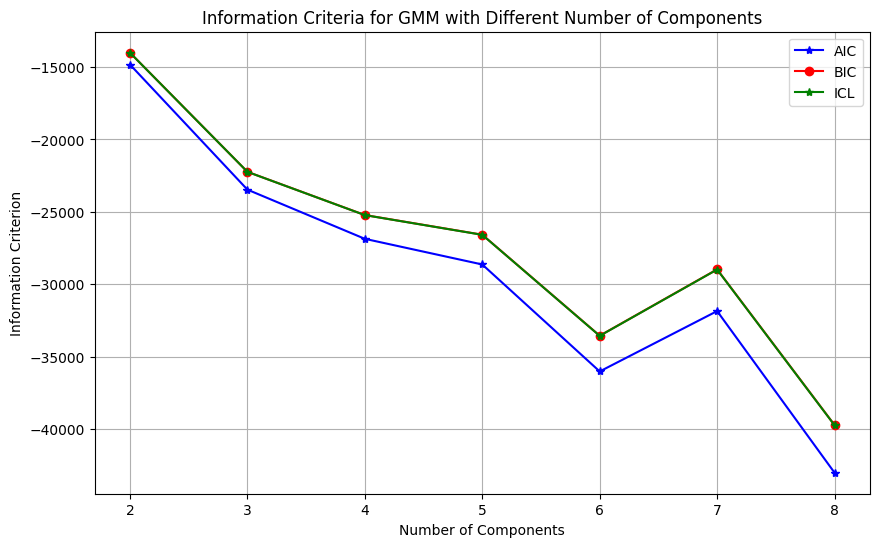

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Data
data_new = x


# Fit Gaussian Mixture Models (GMM) for k=2 to 8
n_components_range = range(2, 9)
bic = []
aic = []
icl = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(data_new)

    bic_value = gmm.bic(data_new)
    aic_value = gmm.aic(data_new)

    bic.append(bic_value)
    aic.append(aic_value)

    # Compute ICL as BIC - 2 * (n_components - 1), if you need it
    icl_value = bic_value - 2 * (n_components - 1)
    icl.append(icl_value)

    # Print values for debugging
    print(f'Components: {n_components}')
    print(f'BIC: {bic_value}')
    print(f'AIC: {aic_value}')
    print(f'ICL: {icl_value}')

# Plot the BIC, AIC, and ICL values
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic, marker='*', linestyle='-', label='AIC', color='blue')
plt.plot(n_components_range, bic, marker='o', linestyle='-', label='BIC', color='red')
plt.plot(n_components_range, icl, marker='*', linestyle='-', label='ICL', color='green')

plt.xlabel("Number of Components")
plt.ylabel("Information Criterion")
plt.title("Information Criteria for GMM with Different Number of Components")
plt.legend()
plt.grid(True)
plt.show()


In [105]:
# Fit GMM with the chosen number of components

df= pd.DataFrame(data_new)


n_optimal_components = 4
gmm = GaussianMixture(n_components=n_optimal_components, random_state=1234)
gmm_labels = gmm.fit_predict(df)

# Add GMM cluster labels to the data
df['GMM_Cluster'] = gmm_labels

# Fit KMeans with the chosen number of clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_optimal_components, random_state=1234)
kmeans_labels = kmeans.fit_predict(data_new)

# Add KMeans cluster labels to the data
df['KMeans_Cluster'] = kmeans_labels

# Compare the clusters using cross-tabulation
comparison = pd.crosstab(df['KMeans_Cluster'], df['GMM_Cluster'])
print(comparison)


GMM_Cluster       0    1    2    3
KMeans_Cluster                    
0                99    8  253    7
1                 0  208   24    5
2               500    0    0   33
3                22   38    0  256


In [106]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'GMM_Cluster', 'KMeans_Cluster'], dtype='object')

In [107]:
df.rename(columns={i: name for i, name in enumerate(['yummy', 'tasty', 'cheap', 'fattening', 'convenient', 'fast', 'spicy', 'healthy', 'greasy', 'expensive', 'disgusting'])}, inplace=True)


In [108]:
df

,yummy,tasty,cheap,fattening,convenient,fast,spicy,healthy,greasy,expensive,disgusting,GMM_Cluster,KMeans_Cluster
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074,1,0
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440,3,3
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741,1,3
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034,0,2
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076,1,1
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671,0,2
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800,3,3
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316,0,2


### Using Mixtures of Regression Models

In [109]:
#Convert the Categorical Variable to Numeric


# Convert 'Like' to numeric variable
data['Like.n'] = 6 - pd.to_numeric(data['Like'], errors='coerce')


In [110]:
from patsy import dmatrix

# Prepare independent variables (perceptions of McDonald's)
independent_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Create a formula string for regression
formula = 'Like.n ~ ' + ' + '.join(independent_vars)


In [111]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

# Convert categorical variables to numeric if necessary
# Assuming `data` is your DataFrame and 'independent_vars' is a list of columns to be used as features
# Convert categorical columns to numeric using LabelEncoder
categorical_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Prepare the data
X = data[independent_vars].astype(float)  # Convert to float
y = data['Like.n'].astype(float)  # Convert target variable to float

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Gaussian Mixture Model (GMM) to identify clusters
gmm = GaussianMixture(n_components=2, random_state=1234)
gmm_labels = gmm.fit_predict(X_scaled)

# Add GMM cluster labels to the data
data['GMM_Cluster'] = gmm_labels

# Fit Linear Regression for each cluster
models = {}
for cluster in np.unique(gmm_labels):
    cluster_data = data[data['GMM_Cluster'] == cluster]
    X_cluster = cluster_data[independent_vars]
    y_cluster = cluster_data['Like.n']

    # Standardize the cluster data
    X_cluster_scaled = scaler.transform(X_cluster)
    y_cluster=y_cluster.fillna(y_cluster.mean())

    model = LinearRegression()
    model.fit(X_cluster_scaled, y_cluster)
    models[cluster] = model

# Assess the models
for cluster, model in models.items():
    print(f"Cluster {cluster} Coefficients:")
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficients: {model.coef_}")
    print()


Cluster 0 Coefficients:
Intercept: 5.026244421377371
Coefficients: [-7.69687328e-01  7.94316311e-02  9.44547822e-02  2.77555756e-17
  1.36527109e-01  5.49471746e-02 -2.09672197e-02 -4.07091973e-01
 -1.68059829e-02  1.37463901e-02  2.39623476e-01]

Cluster 1 Coefficients:
Intercept: 4.004500468110475
Coefficients: [-0.42305333  0.02794116  0.01408755 -0.35317569  0.34925978 -0.00723282
  0.25747532 -0.67125448  0.22005196 -0.1549672   0.00289221]



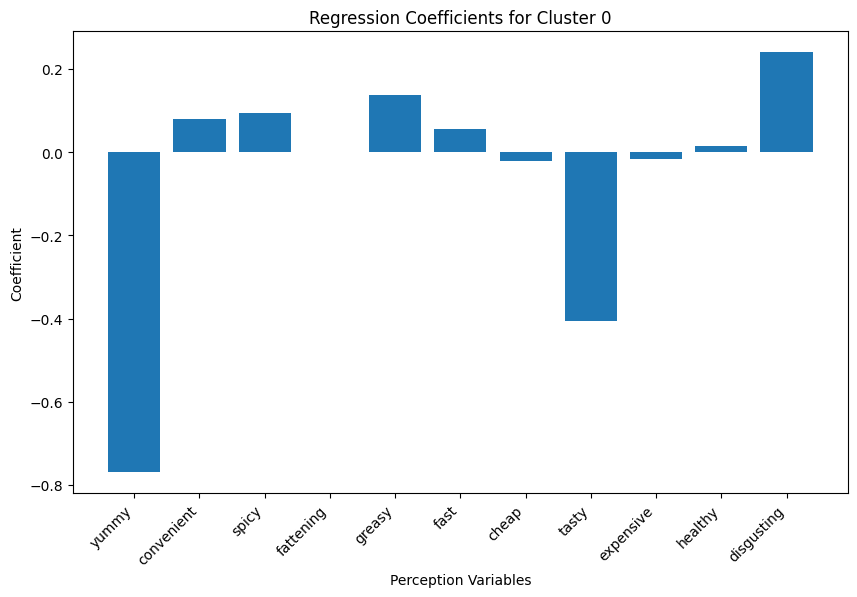

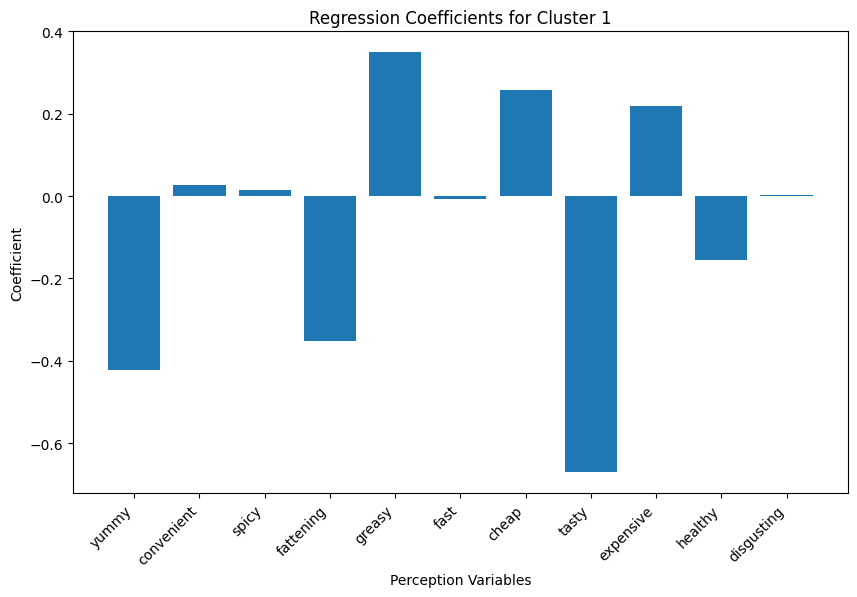

In [112]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Prepare the data for plotting
def plot_regression_coefficients(model, independent_vars, cluster):
    coefs = model.coef_
    intercept = model.intercept_

    plt.figure(figsize=(10, 6))
    plt.bar(independent_vars, coefs)
    plt.xlabel('Perception Variables')
    plt.ylabel('Coefficient')
    plt.title(f'Regression Coefficients for Cluster {cluster}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot coefficients for each cluster
for cluster, model in models.items():
    plot_regression_coefficients(model, independent_vars, cluster)


# **Step 6:Profiling Segments**

In [113]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Calculate the distance matrix on the transpose of x
distance_matrix = pdist(x.T, metric='euclidean')

# Perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')

# Get the order of the attributes
ordered_indices = dendrogram(Z, no_plot=True)['leaves']

# Reorder the columns in x based on the clustering results
x_reordered = x_data.iloc[:, ordered_indices]


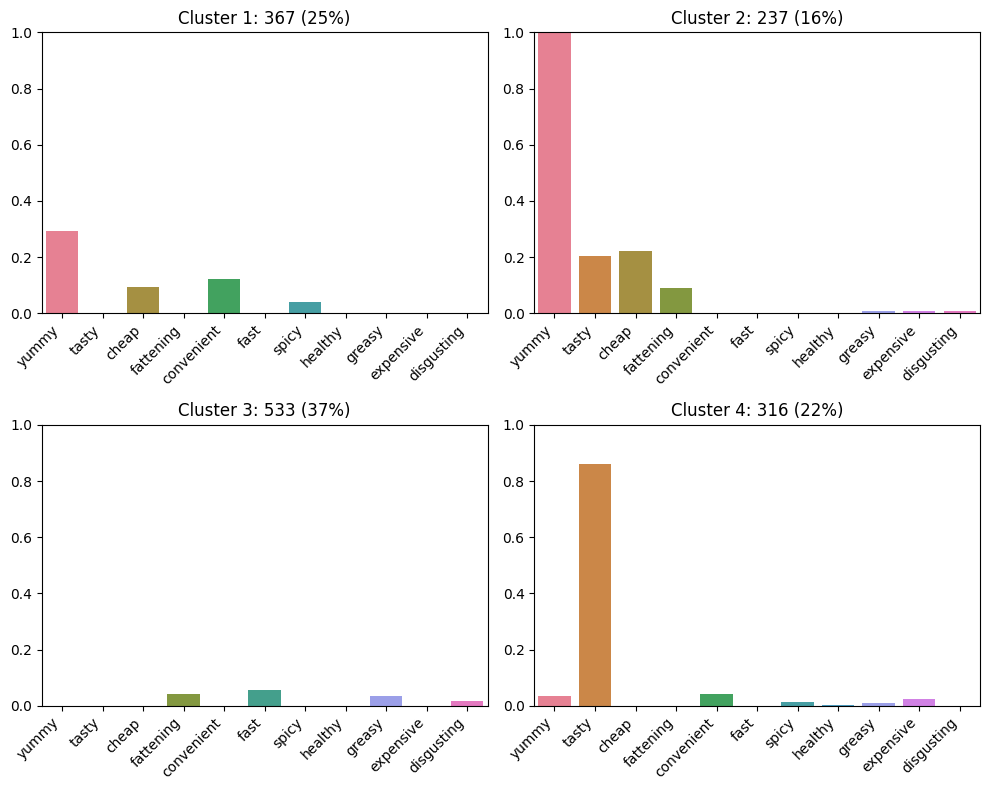

In [114]:
# Plot the segment profile plot
plt.figure(figsize=(10, 8))

# Loop over each cluster to create a plot
for i, (cluster_name, group) in enumerate(df.drop(['GMM_Cluster'],axis=1).groupby('KMeans_Cluster')):
    plt.subplot(2, 2, i+1)
    # Ensure that ordered_indices are valid for the 'group' DataFrame
    valid_indices = [idx for idx in ordered_indices if idx < group.shape[1]]
    sns.barplot(data=group.iloc[:, valid_indices], ci=None)
    plt.title(f'Cluster {i+1}: {len(group)} ({len(group) / len(df) * 100:.0f}%)')

    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

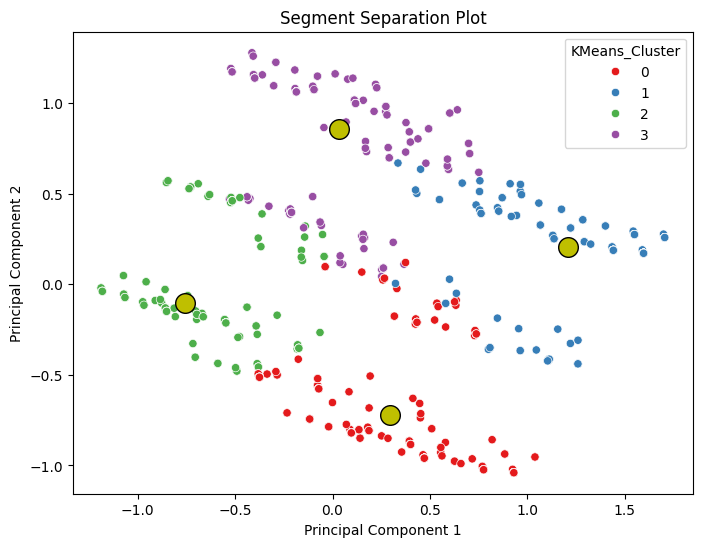

In [115]:
from sklearn.decomposition import PCA

# Perform PCA on the data
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Plot the segment separation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=df['KMeans_Cluster'], palette='Set1')

# Add the cluster centers
centers = np.array([x_pca[df['KMeans_Cluster'] == i].mean(axis=0) for i in range(4)])
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='y', marker='o', edgecolor='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment Separation Plot')
plt.show()


# **Step 7: Describing Segments**

In [116]:
#Extract Segment Membership:
k4=data_predict

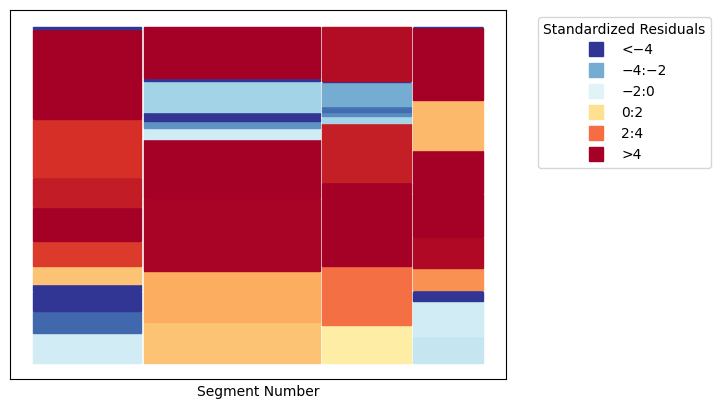

In [117]:
#Cross-tabulate Segment Membership and 'Love-Hate McDonald's' Variable

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

k4 = data_predict.flatten()  # Ensure k4 is a 1D array

# Create a cross-tabulation of clusters and 'Like' variable
crosstab = pd.crosstab(k4, data['Like'])

# Calculate the chi-square test to get the expected frequencies
chi2, p, dof, expected = chi2_contingency(crosstab)

# Calculate standardized residuals
std_residuals = (crosstab - expected) / np.sqrt(expected)

# Plot the mosaic plot with standardized residuals as the color shading
# Convert key[0] to an integer before accessing std_residuals
mosaic(crosstab.stack(), title='', labelizer=lambda k: '', axes_label=False,
       properties=lambda key: {'color': plt.cm.RdYlBu_r((std_residuals.loc[int(key[0]), key[1]] + 4) / 8)})

# Add the custom legend
colors = plt.cm.RdYlBu_r(np.linspace(0, 1, 6))
labels = ['<−4', '−4:−2', '−2:0', '0:2', '2:4', '>4']

patches = [plt.plot([], [], marker="s", ms=10, ls="", mec=None, color=colors[i],
label="{:s}".format(labels[i]))[0]  for i in range(len(labels))]



plt.xlabel('Segment Number')
plt.legend(handles=patches, title="Standardized Residuals", bbox_to_anchor=(1.05, 1), loc='upper left')

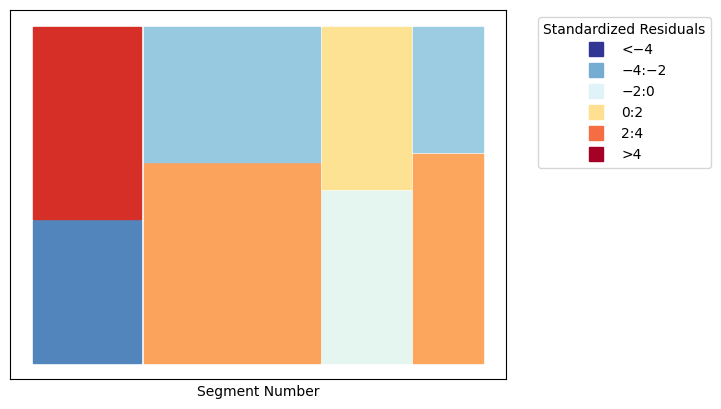

In [118]:
#Create a Mosaic Plot for Gender Distribution


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

k4 = data_predict.flatten()  # Ensure k4 is a 1D array

# Verify the DataFrame containing 'Gender' column
# If 'Gender' is in the 'data' DataFrame, use the following:
crosstab= pd.crosstab(k4, data['Gender'])

# If 'Gender' is in another DataFrame, replace 'data' with the correct DataFrame name

# Calculate the chi-square test to get the expected frequencies
chi2, p, dof, expected = chi2_contingency(crosstab)

# Calculate standardized residuals
std_residuals = (crosstab - expected) / np.sqrt(expected)

# Plot the mosaic plot with standardized residuals as the color shading
# Convert key[0] to an integer before accessing std_residuals
mosaic(crosstab.stack(), title='', labelizer=lambda k: '', axes_label=False,
       properties=lambda key: {'color': plt.cm.RdYlBu_r((std_residuals.loc[int(key[0]), key[1]] + 4) / 8)})

# Add the custom legend
colors = plt.cm.RdYlBu_r(np.linspace(0, 1, 6))
labels = ['<−4', '−4:−2', '−2:0', '0:2', '2:4', '>4']

patches = [plt.plot([], [], marker="s", ms=10, ls="", mec=None, color=colors[i],
label="{:s}".format(labels[i]))[0]  for i in range(len(labels))]



plt.xlabel('Segment Number')
plt.legend(handles=patches, title="Standardized Residuals", bbox_to_anchor=(1.05, 1), loc='upper left')

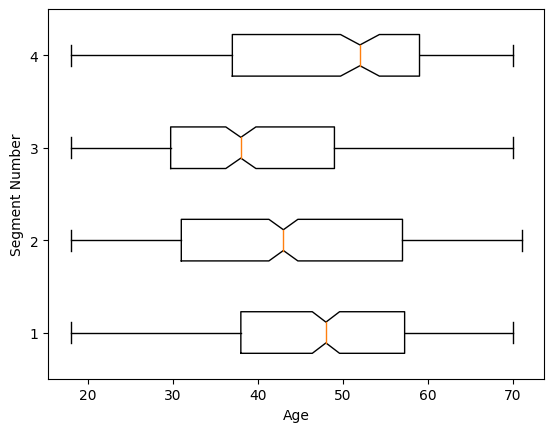

In [119]:
#Create a Parallel Box-and-Whisker Plot for Age


# Plot the boxplot
plt.boxplot([data['Age'][k4 == i] for i in range(4)], notch=True, vert=False)
plt.xlabel('Age')
plt.ylabel('Segment Number')
plt.show()


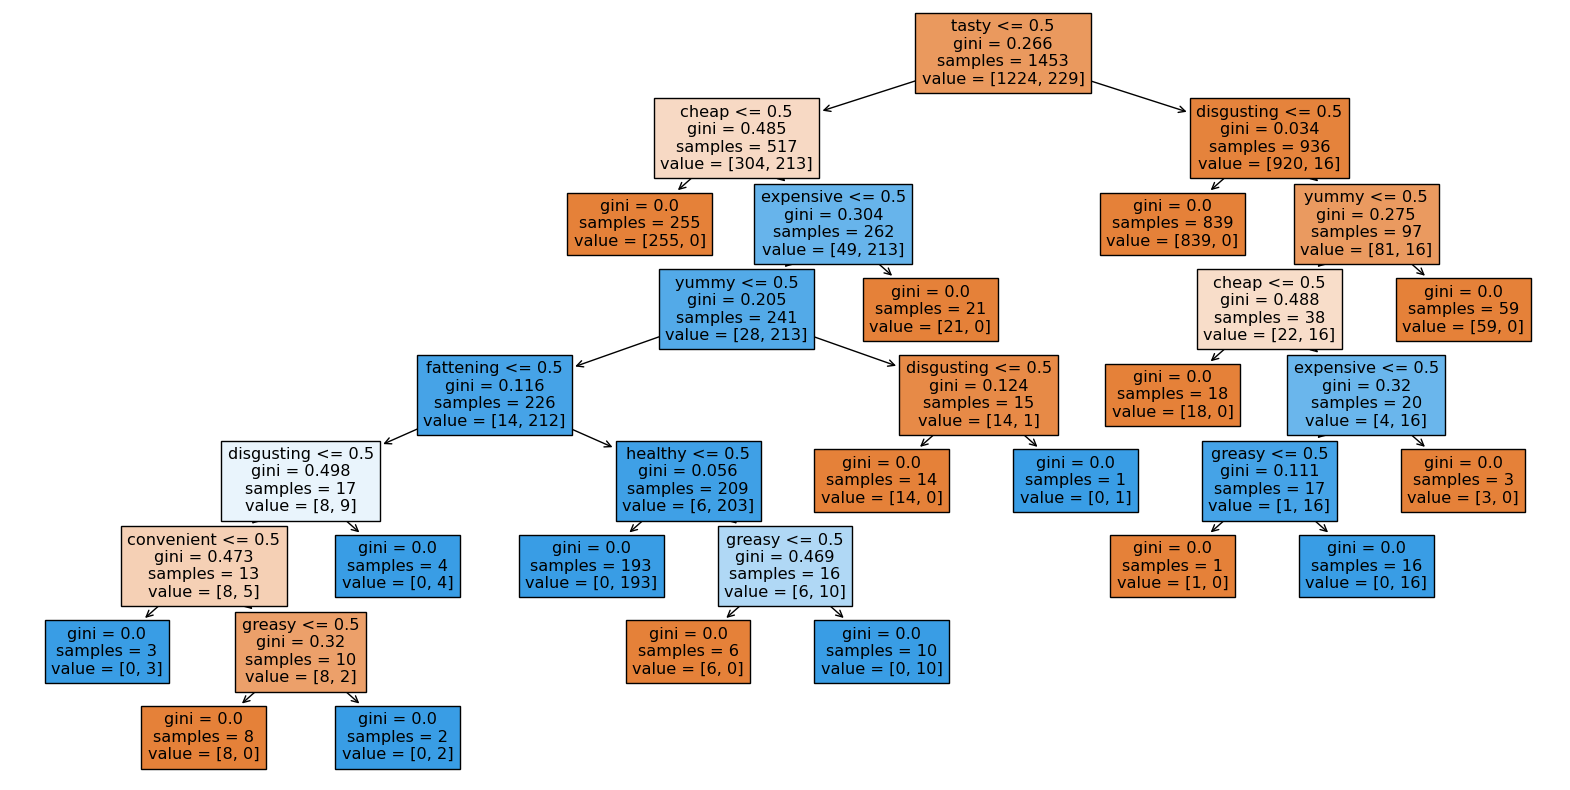

In [120]:
#Conditional Inference Tree:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Assuming X contains the feature set and target is the target variable
# Let's say 'Like.n' is categorical

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Now fit the decision tree model
tree = DecisionTreeClassifier()
tree.fit(X_encoded, target)

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_encoded.columns)
plt.show()


# **Step 8: Selecting (the) Target segment(s)**

In [123]:
data['Cluster']=data_predict

Visit Frequency per Cluster: Cluster
0    1.747191
1    2.864583
2    2.907534
3    1.493450
Name: VisitFrequency, dtype: float64
Liking McDonald's per Cluster: Cluster
0    6.558594
1    4.010395
2    3.765432
3    7.028090
Name: Like.n, dtype: float64
Percentage of Females per Cluster: Cluster
0    0.426966
1    0.595486
2    0.513699
3    0.624454
Name: Gender, dtype: float64


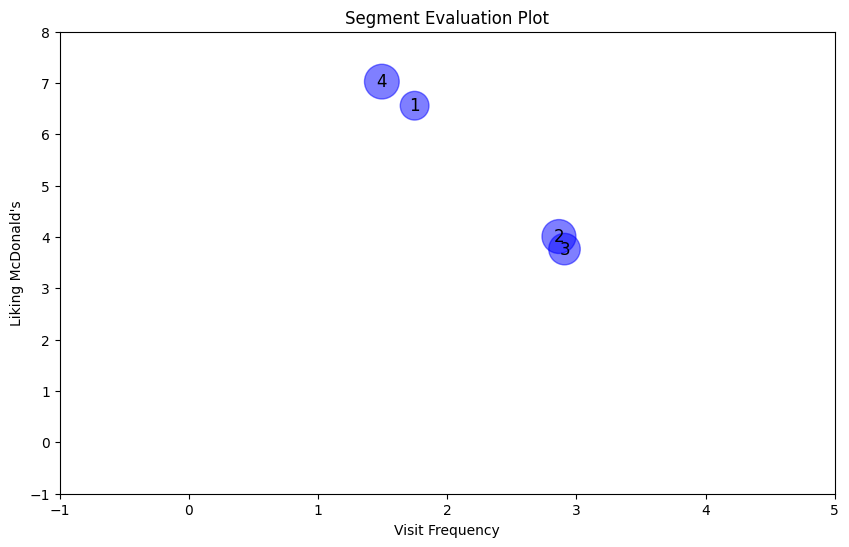

In [136]:
#Map the VisitFrequency strings to numeric values
#Convert the VisitFrequency column to numeric
#Calculate the mean values and plot the data


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Re-check the computed means
print("Visit Frequency per Cluster:", visit)
print("Liking McDonald's per Cluster:", like)
print("Percentage of Females per Cluster:", female)

# Plotting the bubbles
plt.figure(figsize=(10, 6))

# Scatter plot with bubble sizes
plt.scatter(visit, like, s=1000 * female, alpha=0.5, color='blue')

# Adding text labels for each segment
for i in range(len(visit)):
    plt.text(visit.iloc[i], like.iloc[i], str(i + 1), fontsize=12, ha='center', va='center')

# Setting axis limits similar to the example plot
plt.xlim(-1, 5)
plt.ylim(-1, 8)

# Adding labels and title
plt.xlabel('Visit Frequency')
plt.ylabel('Liking McDonald\'s')
plt.title('Segment Evaluation Plot')

# Display the plot
plt.show()
